In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
import csv
import os
from pathlib import Path
from tqdm import tqdm
import matplotlib.pyplot as plt
import random

In [3]:
from fastai import *
from fastai.vision import *
from fastai.callbacks import *

In [4]:
path = Path('/data/Datasets/EIPH_WSI/Patches/')

In [5]:
tfms = get_transforms(do_flip=True, 
                      flip_vert=True, 
                      max_rotate=90,  
                      #max_lighting=0.15, 
                      #max_zoom=2, 
                      #max_warp=0.2,
                      #p_affine=0.75,
                      #p_lighting=0.75,  
                      #xtra_tfms=xtra_tfms,
                     )

In [6]:
def get_data(bs,size):
    data = ImageDataBunch.from_folder(path, valid_pct=0.1, size=size, bs=bs, ds_tfms=tfms)
    return data.normalize()

In [18]:
data = get_data(64,64)

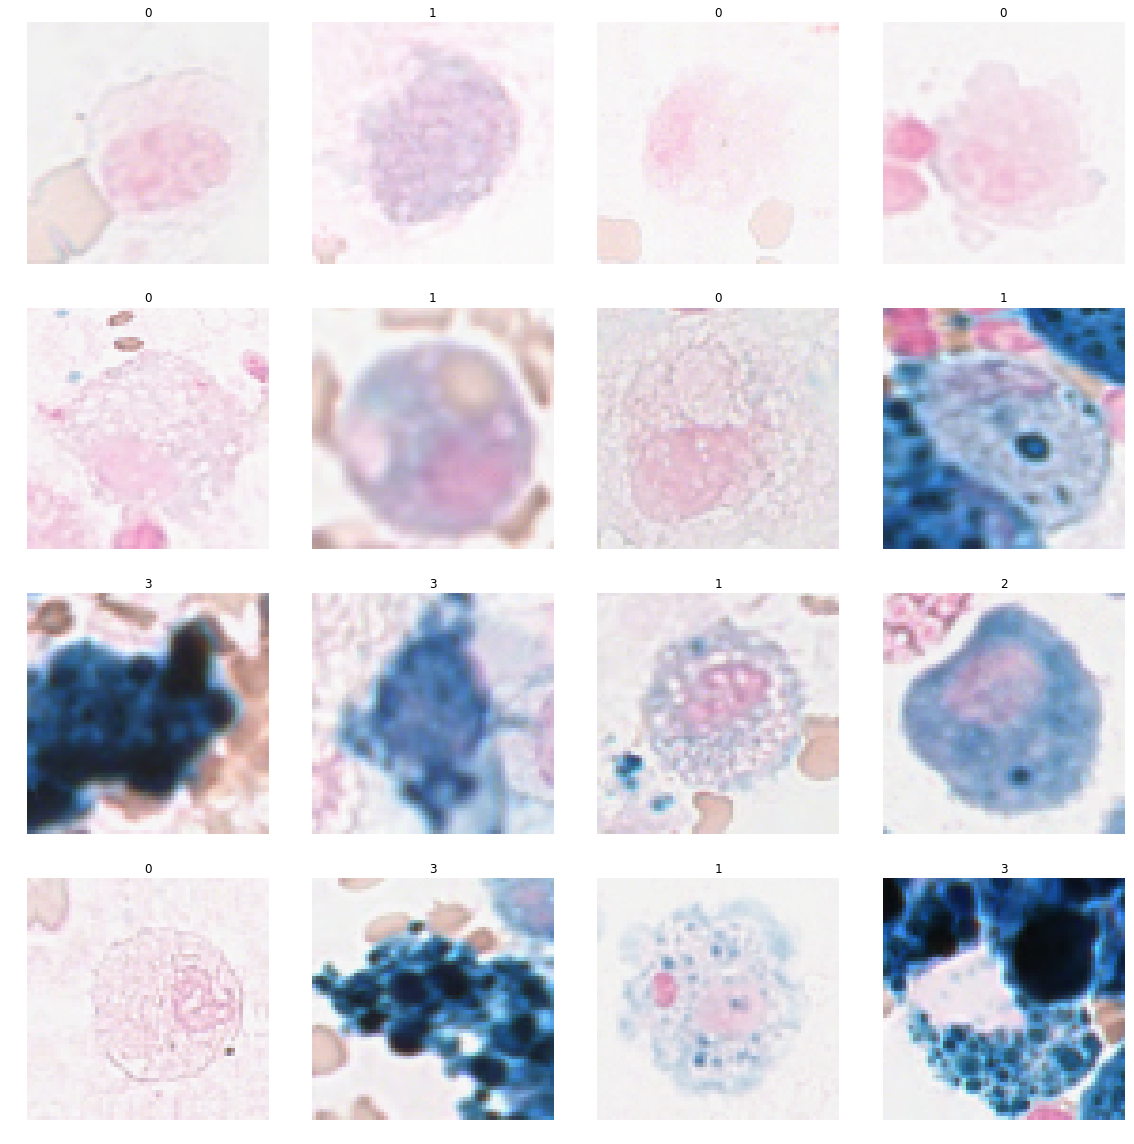

In [16]:
data.show_batch(4)

In [11]:
learn = create_cnn(get_data(256,128), models.resnet18, metrics=error_rate, callback_fns=[ShowGraph])

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


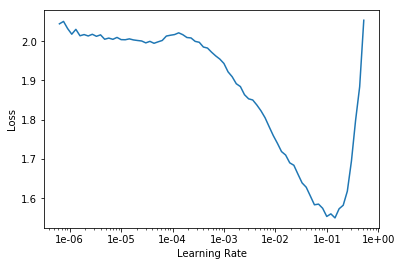

In [20]:
learn.lr_find()
learn.recorder.plot()

In [12]:
lr = 0.05
learn.fit_one_cycle(5, slice(lr))

epoch,train_loss,valid_loss,error_rate
1,0.438668,0.430059,0.169657
2,0.400822,0.470658,0.173501
3,0.360802,0.395742,0.157227
4,0.334589,0.303490,0.128268
5,0.309371,0.295185,0.126345


In [13]:
learn.unfreeze()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


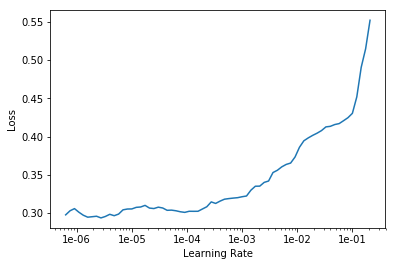

In [14]:
learn.lr_find()
learn.recorder.plot()

In [15]:
lr = 0.001
learn.fit_one_cycle(10, slice(1e-5, lr/5))

epoch,train_loss,valid_loss,error_rate
1,0.313956,0.294699,0.125577
2,0.316481,0.296066,0.126602
3,0.300155,0.289017,0.123398
4,0.301341,0.287576,0.124423
5,0.291557,0.293305,0.126602
6,0.288201,0.282710,0.120579
7,0.285475,0.282889,0.120707
8,0.280446,0.282951,0.120195
9,0.283237,0.281404,0.120964
10,0.278824,0.281293,0.121604


In [16]:
interp = ClassificationInterpretation.from_learner(learn)
losses,idxs = interp.top_losses()

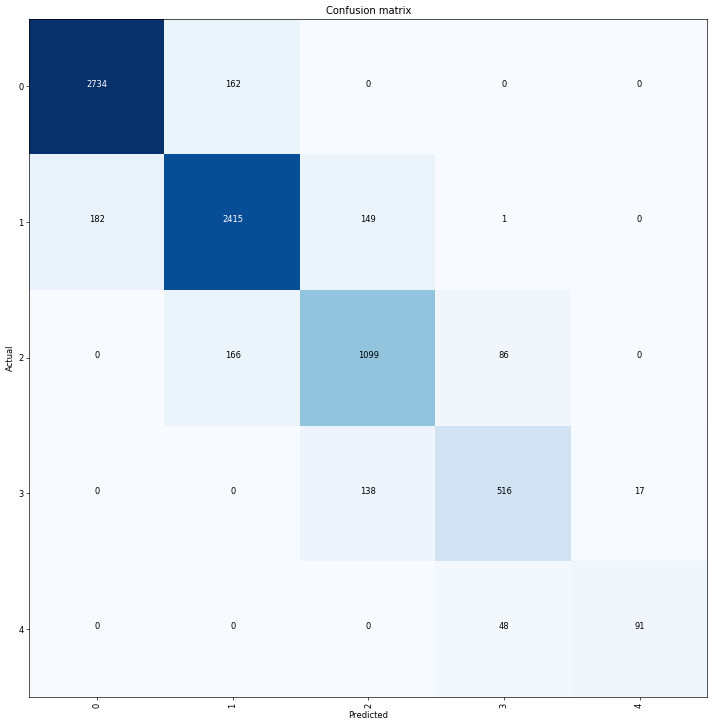

In [17]:
interp.plot_confusion_matrix(figsize=(12,12), dpi=60)

In [18]:
interp.most_confused(min_val=2)

[('1', '0', 182),
 ('2', '1', 166),
 ('0', '1', 162),
 ('1', '2', 149),
 ('3', '2', 138),
 ('2', '3', 86),
 ('4', '3', 48),
 ('3', '4', 17)]